In [1]:
import keras
import quandl
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math

/home/chris/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

In [3]:
raw_data = quandl.get('BITFINEX/BTCUSD')

## See the data

In [4]:
raw_data.head()

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2014-04-15,513.9000,452.00,504.23500,505.0000,503.5000,504.97,21013.584774
2014-04-16,547.0000,495.00,537.50000,538.0000,537.0000,538.00,29633.358705
2014-04-17,538.5000,486.10,507.02000,508.0000,506.0400,508.00,20709.783819
2014-04-18,509.0000,474.25,483.77000,482.7500,482.7500,484.79,10458.045243
2014-04-19,513.9899,473.83,505.01065,507.4999,502.5313,507.49,8963.618369


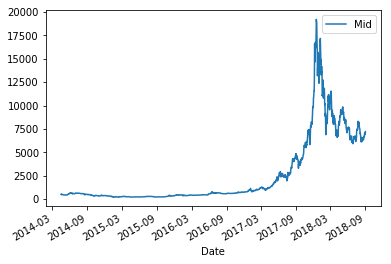

In [5]:
raw_data.drop(['High','Low','Last','Bid','Ask','Volume'],axis=1).plot.line()

## Feat eng

In [6]:
data = raw_data.drop(['High','Low','Last','Bid','Ask'],axis=1)

In [7]:
data['day'] = data.index.day
data['dayofweek'] = data.index.dayofweek
data['month'] = data.index.month
data['year'] = data.index.year

In [8]:
print('DPs: ', data.shape[0])
data.head()

DPs:  1568


,Mid,Volume,day,dayofweek,month,year
Date,,,,,,
2014-04-15,504.23500,21013.584774,15,1,4,2014
2014-04-16,537.50000,29633.358705,16,2,4,2014
2014-04-17,507.02000,20709.783819,17,3,4,2014
2014-04-18,483.77000,10458.045243,18,4,4,2014
2014-04-19,505.01065,8963.618369,19,5,4,2014


## Le train & Le test
### + feats labels split

In [9]:
train_size = int(len(data) * 0.90)
test_size = len(data) - train_size

In [10]:
label = ['Mid']
feats = [c for c in data.columns if c not in label]

In [11]:
train = data[:train_size]
test = data[train_size:]

In [12]:
len(train), len(test), len(train) + len(test)

(1411, 157, 1568)

In [13]:
X_train = train[feats]
y_train = train[label]
X_test = test[feats]
y_test = test[label]

In [14]:
reg = RandomForestRegressor(max_depth=5, random_state=0)

In [15]:
reg.fit(X_train, y_train)

/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
trainPredict = reg.predict(X_train)
testPredict = reg.predict(X_test)

In [17]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, testPredict))

# RMSE
print("Root Mean squared error: %.2f"
      % math.sqrt(mean_squared_error(y_test, testPredict)))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, testPredict))

Mean squared error: 7641643.17
Root Mean squared error: 2764.35
R2 score: -6.76


In [18]:
#enche as previsoes de teste de NaN para o plot
for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, np.nan)

In [19]:
plt.rcParams['figure.figsize'] = [20, 10]

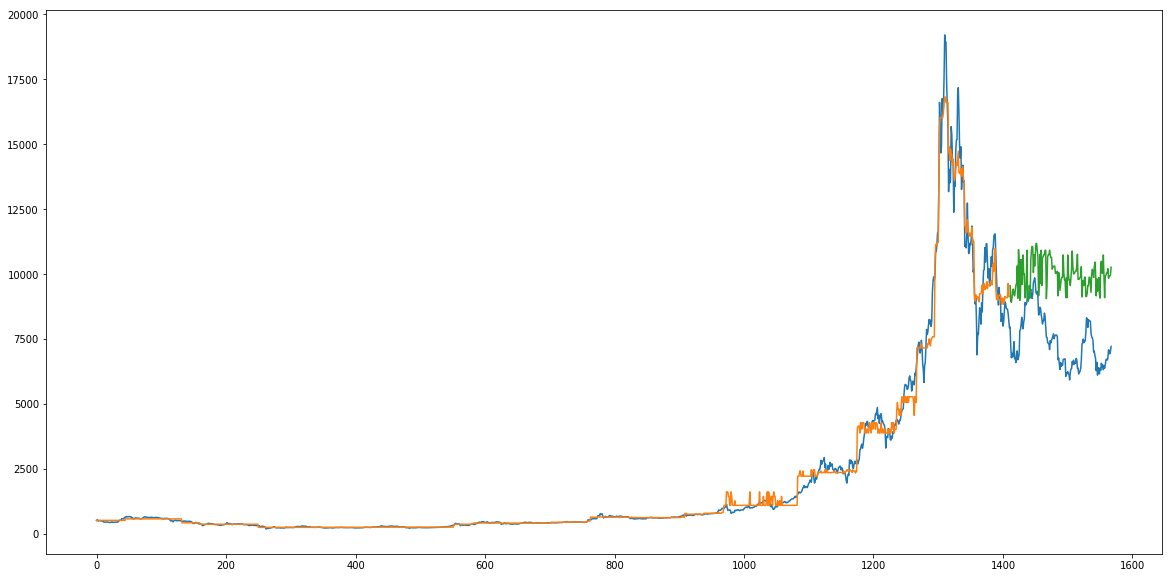

In [20]:
# plot baseline and predictions
plt.plot(raw_data.reset_index().drop(['High','Low','Last','Bid','Ask','Volume','Date'],axis=1))
plt.plot(trainPredict)
plt.plot(testPredict)

plt.show()

## Shitty...
### Try to remove first years, those were other times

In [21]:
print('DPs: ', data.shape[0])
data.head()

DPs:  1568


,Mid,Volume,day,dayofweek,month,year
Date,,,,,,
2014-04-15,504.23500,21013.584774,15,1,4,2014
2014-04-16,537.50000,29633.358705,16,2,4,2014
2014-04-17,507.02000,20709.783819,17,3,4,2014
2014-04-18,483.77000,10458.045243,18,4,4,2014
2014-04-19,505.01065,8963.618369,19,5,4,2014


In [22]:
recent_data = data.iloc[969:]
recent_data.head()

,Mid,Volume,day,dayofweek,month,year
Date,,,,,,
2017-01-01,966.995,7147.774423,1,6,1,2017
2017-01-02,998.290,13440.456264,2,0,1,2017
2017-01-03,1019.450,21804.197216,3,1,1,2017
2017-01-04,1038.500,14128.625714,4,2,1,2017
2017-01-05,1138.650,53698.692041,5,3,1,2017


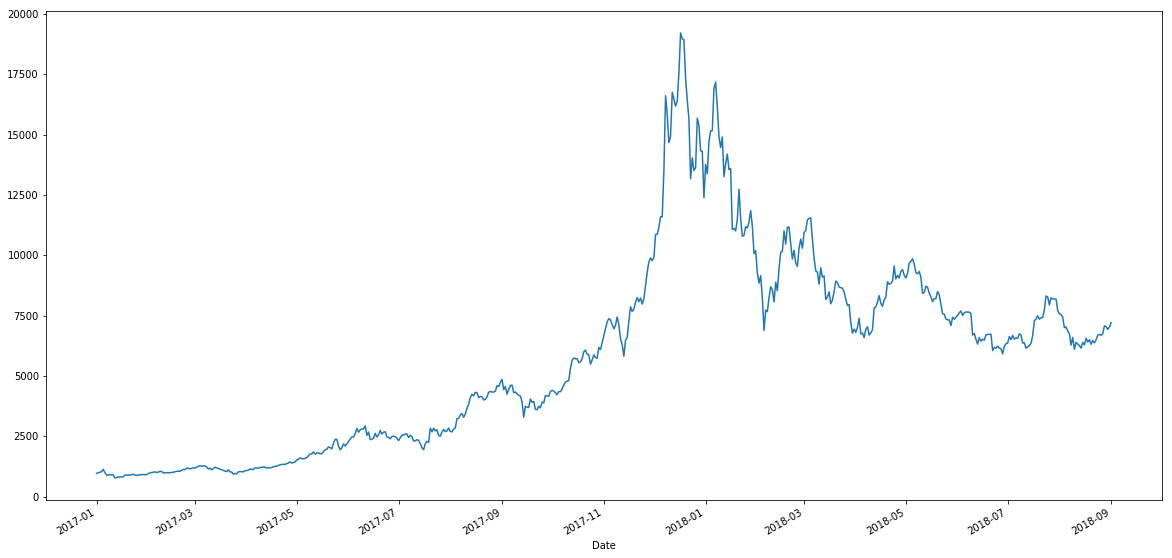

In [23]:
recent_data.Mid.plot.line()

## Much better
### try again

In [24]:
train_size = int(len(recent_data) * 0.90)
test_size = len(recent_data) - train_size
label = ['Mid']
feats = [c for c in recent_data.columns if c not in label]
train = recent_data[:train_size]
test = recent_data[train_size:]
len(train), len(test), len(train) + len(test)

(539, 60, 599)

In [25]:
X_train = train[feats]
y_train = train[label]
X_test = test[feats]
y_test = test[label]

In [26]:
reg = RandomForestRegressor(max_depth=5, random_state=0)
reg.fit(X_train, y_train)

/home/chris/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [27]:
trainPredict = reg.predict(X_train)
testPredict = reg.predict(X_test)

In [28]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, testPredict))
# RMSE
print("Root Mean squared error: %.2f"
      % math.sqrt(mean_squared_error(y_test, testPredict)))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, testPredict))

Mean squared error: 735439.45
Root Mean squared error: 857.58
R2 score: -0.88


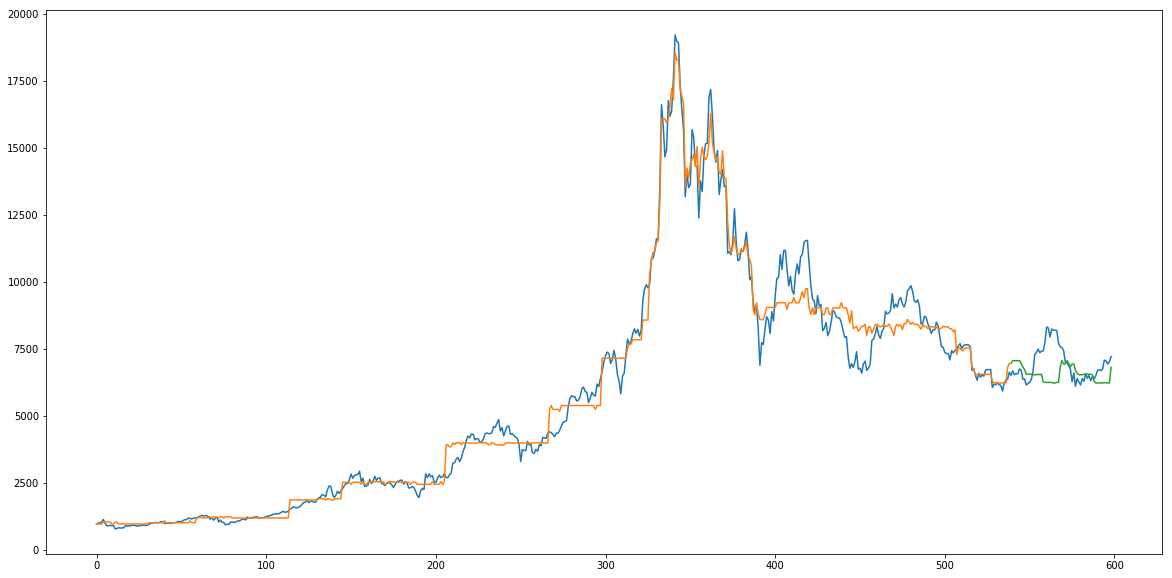

In [29]:
#enche as previsoes de teste de NaN para o plot
for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, np.nan)
# plot baseline and predictions
plt.plot(recent_data.reset_index().drop(['Volume','day','dayofweek','month','year','Date'],axis=1))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

## Much better <3
### MLP?

In [98]:
# create and fit Multilayer Perceptron model# create 
model = Sequential()
model.add(Dense(16, input_dim=5, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [99]:
model.fit(X_train, y_train, epochs=700, batch_size=16, verbose=1)

Epoch 1/700
539/539 [==============================] - 1s 1ms/step - loss: 161703787.2801
Epoch 2/700
539/539 [==============================] - 0s 200us/step - loss: 45511508.4712
Epoch 3/700
539/539 [==============================] - 0s 217us/step - loss: 34960849.9332
Epoch 4/700
539/539 [==============================] - 0s 306us/step - loss: 26490206.9685
Epoch 5/700
539/539 [==============================] - 0s 191us/step - loss: 20321130.7866
Epoch 6/700
539/539 [==============================] - 0s 303us/step - loss: 17527011.4063
Epoch 7/700
539/539 [==============================] - 0s 196us/step - loss: 16906339.6698
Epoch 8/700
539/539 [==============================] - 0s 234us/step - loss: 16868503.9518
Epoch 9/700
539/539 [==============================] - 0s 362us/step - loss: 16853814.2430
Epoch 10/700
539/539 [==============================] - 0s 247us/step - loss: 16853817.9017
Epoch 11/700
539/539 [==============================] - 0s 287us/step - loss: 16834200.081

539/539 [==============================] - 0s 452us/step - loss: 14077298.9351
Epoch 91/700
539/539 [==============================] - 0s 680us/step - loss: 14036838.8609
Epoch 92/700
539/539 [==============================] - 0s 288us/step - loss: 14043015.9963
Epoch 93/700
539/539 [==============================] - 0s 252us/step - loss: 14094232.8237
Epoch 94/700
539/539 [==============================] - 0s 296us/step - loss: 13935441.5853
Epoch 95/700
539/539 [==============================] - 0s 260us/step - loss: 13828162.2384
Epoch 96/700
539/539 [==============================] - 0s 250us/step - loss: 13828972.5770
Epoch 97/700
539/539 [==============================] - 0s 619us/step - loss: 13824620.7922
Epoch 98/700
539/539 [==============================] - 0s 280us/step - loss: 13763761.6456
Epoch 99/700
539/539 [==============================] - 0s 314us/step - loss: 13927163.7941
Epoch 100/700
539/539 [==============================] - 0s 394us/step - loss: 13724297.0853


539/539 [==============================] - 0s 394us/step - loss: 12610054.5918
Epoch 179/700
539/539 [==============================] - 0s 342us/step - loss: 12572898.2931
Epoch 180/700
539/539 [==============================] - 0s 392us/step - loss: 12259669.1800
Epoch 181/700
539/539 [==============================] - 0s 622us/step - loss: 12326678.7143
Epoch 182/700
539/539 [==============================] - 0s 388us/step - loss: 12327161.2282
Epoch 183/700
539/539 [==============================] - 0s 255us/step - loss: 12229395.3173
Epoch 184/700
539/539 [==============================] - 0s 433us/step - loss: 12679678.7866
Epoch 185/700
539/539 [==============================] - 0s 407us/step - loss: 12427451.2096
Epoch 186/700
539/539 [==============================] - 0s 195us/step - loss: 12535093.7718
Epoch 187/700
539/539 [==============================] - 0s 252us/step - loss: 12278411.6818
Epoch 188/700
539/539 [==============================] - 0s 232us/step - loss: 12300

539/539 [==============================] - 0s 235us/step - loss: 12426816.2078
Epoch 267/700
539/539 [==============================] - 0s 223us/step - loss: 12190163.0686
Epoch 268/700
539/539 [==============================] - 0s 230us/step - loss: 12302885.8868
Epoch 269/700
539/539 [==============================] - 0s 137us/step - loss: 12322374.1308
Epoch 270/700
539/539 [==============================] - 0s 145us/step - loss: 12261928.8905
Epoch 271/700
539/539 [==============================] - 0s 157us/step - loss: 12284722.6623
Epoch 272/700
539/539 [==============================] - 0s 193us/step - loss: 12534462.3210
Epoch 273/700
539/539 [==============================] - 0s 215us/step - loss: 12715109.7607
Epoch 274/700
539/539 [==============================] - 0s 181us/step - loss: 12294687.8905
Epoch 275/700
539/539 [==============================] - 0s 164us/step - loss: 12323575.6920
Epoch 276/700
539/539 [==============================] - 0s 240us/step - loss: 12271

539/539 [==============================] - 0s 375us/step - loss: 12278016.3358
Epoch 355/700
539/539 [==============================] - 0s 264us/step - loss: 12208142.0167
Epoch 356/700
539/539 [==============================] - 0s 332us/step - loss: 12493774.6141
Epoch 357/700
539/539 [==============================] - 0s 272us/step - loss: 13046878.2078
Epoch 358/700
539/539 [==============================] - 0s 299us/step - loss: 12406421.9610
Epoch 359/700
539/539 [==============================] - 0s 256us/step - loss: 12294837.5158
Epoch 360/700
539/539 [==============================] - 0s 475us/step - loss: 12436713.1670
Epoch 361/700
539/539 [==============================] - 0s 238us/step - loss: 12339936.1113
Epoch 362/700
539/539 [==============================] - 0s 168us/step - loss: 12199731.1076
Epoch 363/700
539/539 [==============================] - 0s 188us/step - loss: 12395820.4508
Epoch 364/700
539/539 [==============================] - 0s 337us/step - loss: 12463

539/539 [==============================] - 0s 342us/step - loss: 12319121.7328
Epoch 443/700
539/539 [==============================] - 0s 244us/step - loss: 12302875.5863
Epoch 444/700
539/539 [==============================] - 0s 281us/step - loss: 12505665.3154
Epoch 445/700
539/539 [==============================] - 0s 218us/step - loss: 12228104.5492
Epoch 446/700
539/539 [==============================] - 0s 320us/step - loss: 12384292.6447
Epoch 447/700
539/539 [==============================] - 0s 215us/step - loss: 12392371.8404
Epoch 448/700
539/539 [==============================] - 0s 258us/step - loss: 12299558.7588
Epoch 449/700
539/539 [==============================] - 0s 278us/step - loss: 12133627.8738
Epoch 450/700
539/539 [==============================] - 0s 324us/step - loss: 12270903.3024
Epoch 451/700
539/539 [==============================] - 0s 303us/step - loss: 12219583.6846
Epoch 452/700
539/539 [==============================] - 0s 270us/step - loss: 12212

539/539 [==============================] - 0s 275us/step - loss: 12267758.7560
Epoch 531/700
539/539 [==============================] - 0s 294us/step - loss: 12450368.2597
Epoch 532/700
539/539 [==============================] - 0s 434us/step - loss: 12160723.8998
Epoch 533/700
539/539 [==============================] - 0s 337us/step - loss: 12554665.4100
Epoch 534/700
539/539 [==============================] - 0s 283us/step - loss: 12371404.4518
Epoch 535/700
539/539 [==============================] - 0s 280us/step - loss: 12137339.3117
Epoch 536/700
539/539 [==============================] - 0s 269us/step - loss: 12237843.8813
Epoch 537/700
539/539 [==============================] - 0s 275us/step - loss: 12146954.9314
Epoch 538/700
539/539 [==============================] - 0s 316us/step - loss: 12330066.4740
Epoch 539/700
539/539 [==============================] - 0s 261us/step - loss: 12100148.9388
Epoch 540/700
539/539 [==============================] - 0s 284us/step - loss: 12359

539/539 [==============================] - 0s 433us/step - loss: 12208515.8497
Epoch 619/700
539/539 [==============================] - 0s 251us/step - loss: 12166307.6438
Epoch 620/700
539/539 [==============================] - 0s 320us/step - loss: 12275203.7180
Epoch 621/700
539/539 [==============================] - 0s 347us/step - loss: 12178532.6772
Epoch 622/700
539/539 [==============================] - 0s 384us/step - loss: 12257284.7236
Epoch 623/700
539/539 [==============================] - 0s 266us/step - loss: 12352541.1364
Epoch 624/700
539/539 [==============================] - 0s 483us/step - loss: 12249119.6790
Epoch 625/700
539/539 [==============================] - 0s 288us/step - loss: 12229748.1577
Epoch 626/700
539/539 [==============================] - 0s 223us/step - loss: 12531839.8776
Epoch 627/700
539/539 [==============================] - 0s 302us/step - loss: 12314473.1596
Epoch 628/700
539/539 [==============================] - 0s 280us/step - loss: 12224

In [100]:
# Estimate model performance
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 12260365.94 MSE (3501.48 RMSE)
Test Score: 8713498.10 MSE (2951.86 RMSE)


In [101]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [102]:
#enche as previsoes de teste de NaN para o plot
for i in range(len(trainPredict)):
    testPredict = np.insert(testPredict, 0, np.nan)

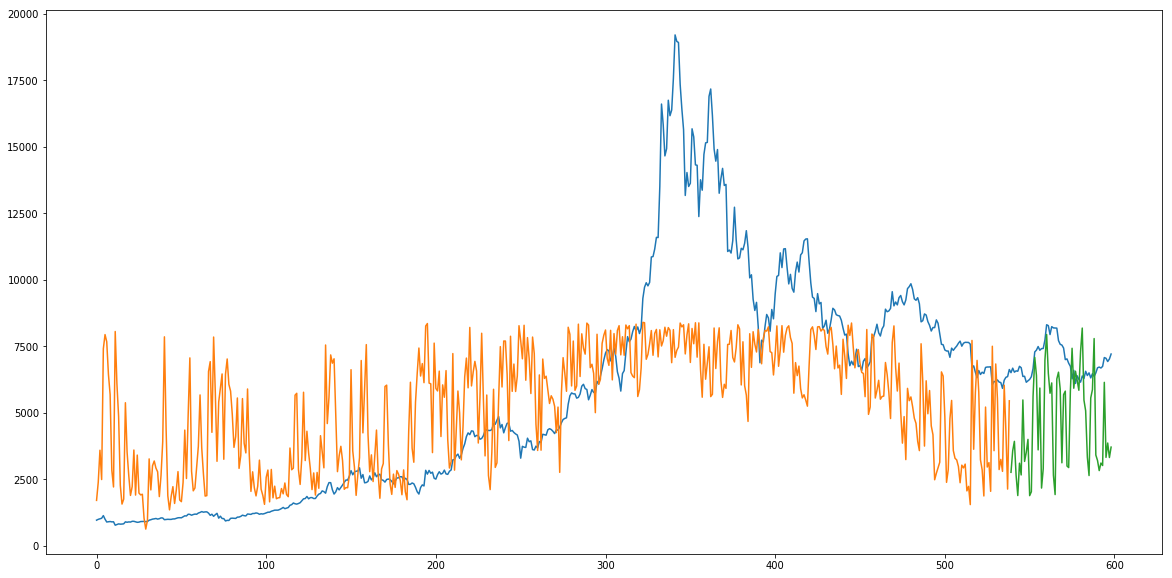

In [103]:
# plot baseline and predictions
plt.plot(recent_data.reset_index().drop(['Volume','day','dayofweek','month','year','Date'],axis=1))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [104]:
X_train.head()

,Volume,day,dayofweek,month,year
Date,,,,,
2017-01-01,7147.774423,1,6,1,2017
2017-01-02,13440.456264,2,0,1,2017
2017-01-03,21804.197216,3,1,1,2017
2017-01-04,14128.625714,4,2,1,2017
2017-01-05,53698.692041,5,3,1,2017
